# ĐỒ ÁN PTDLKD

##### Import thư viện

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##### Import dataset

In [2]:
df_marketing = pd.read_csv('marketing_data.csv')
print(df_marketing.info())
df_marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


##### Đổi dữ liệu cột Income từ chuỗi sang dạng số


In [3]:
# Xử lý những cột có chứa khoảng trắng
df_marketing.columns = df_marketing.columns.str.replace(' ','')

# Chuyển đổi kiểu dữ liệu cột Income
df_marketing['Income'] = df_marketing['Income'].str.replace('$','',regex=True)
df_marketing['Income'] = df_marketing['Income'].str.replace(',','').astype('float')

In [4]:
# Sau khi xử lý 
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Phân tích dữ liệu
1. Kiểm tra xem có dữ liệu null hay không? 
2. Có dữ liệu bất thường không?
3. Có cột dữ liệu nào cần đổi kiểu dữ liệu không?


### 1. Kiểm tra dữ liệu Null

In [5]:
# Kiểm tra dữ liệu null
df_marketing.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

##### Nhận xét
1. Cột Income chứa 24 giá trị Null
2. Tiến hành fill các giá trị median vào các giá trị Null


In [6]:
df_marketing['Income'] = df_marketing['Income'].fillna(df_marketing['Income'].median())

### 2. Kiểm tra Outliers

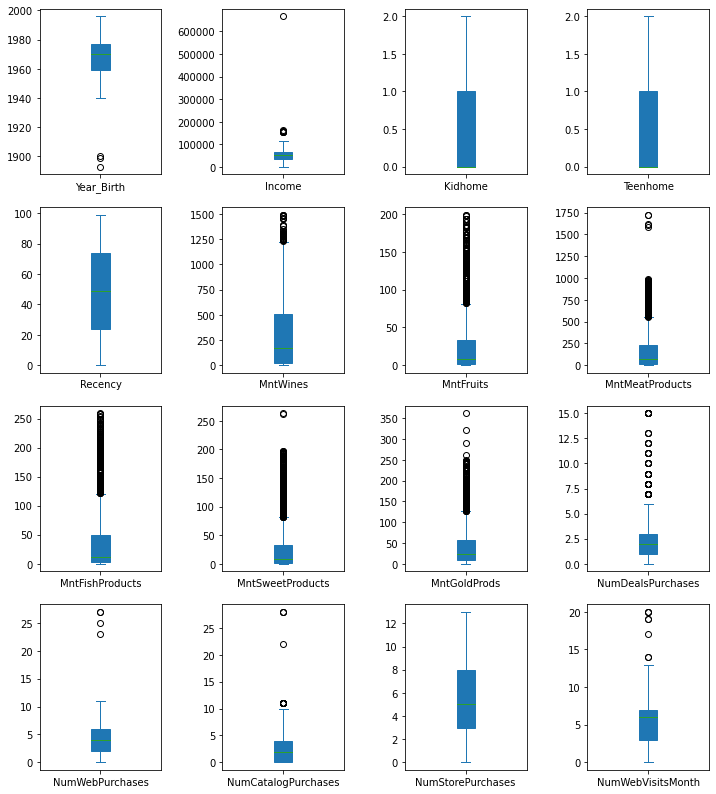

In [7]:
# Sử dụng Boxplot kiểm tra Outliers của các cột thuộc tính
# select columns to plot
df_to_plot = df_marketing.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

##### Nhận xét
1. Rất nhiều cột có ngoại lệ
2. Cột Year_Birth với Year_Birth <= 1900 hiện tại đã vượt ngoài 120 tuổi, không đúng logic.
3. Tiến hành xóa những hàng dữ liệu với Year_Birth <= 1900

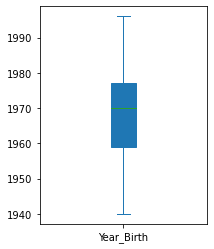

In [8]:
df_marketing = df_marketing[df_marketing['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df_marketing['Year_Birth'].plot(kind='box', patch_artist=True);

### 3. Kiểm tra kiểu dữ liệu

In [9]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

##### Cột Dt_Customer nên chuyển về dạng datetime

In [10]:
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'])

## Xem xét những cột cần chuyển đổi, tạo mới cột dữ liệu
1. Cột số người thân (Dependents) có thể được tính bằng tổng của 2 cột 'Kidhome' và 'Teenhome'
2. Có thể tạo 1 cột 'TotalMnt' bằng cách tính tổng các cột có từ khóa là 'Mnt'
3. Có thể tạo 1 cột 'TotalPurschases' bằng cách tính tổng các cột có từ khóa là 'Purchases'
4. Có thể tạo 1 cột 'TotalCampaignsAcc' bằng cách tính tổng các cột chứa từ khóa là 'Cmp' và 'Response'

In [11]:
# Dependents
df_marketing['Dependents'] = df_marketing['Kidhome'] + df_marketing['Teenhome']

# Total Amount Spent
mnt_cols = [col for col in df_marketing.columns if 'Mnt' in col]
df_marketing['TotalMnt'] = df_marketing[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df_marketing.columns if 'Purchases' in col]
df_marketing['TotalPurchases'] = df_marketing[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df_marketing.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df_marketing['TotalCampaignsAcc'] = df_marketing[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df_marketing[['ID', 'Dependents', 'Dt_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Dt_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014-06-16,1190,15,1
1,1,0,2014-06-15,577,18,2
2,10476,1,2014-05-13,251,11,0
3,1386,2,2014-05-11,11,4,0
4,5371,1,2014-04-08,91,8,2


In [21]:
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,0,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,1190,15,1
1,1,1961,0,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,577,18,2
2,10476,1958,0,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,251,11,0
3,1386,1967,0,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,11,4,0
4,5371,1989,0,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,91,8,2


In [13]:
#Phân loại cho cột Education.
df_marketing.Education = df_marketing.Education.map({'Graduation':0, 'Master':1,'PhD':2,'2n Cycle':3,'Basic':4})

In [17]:
df_marketing.Education.value_counts()

0    1127
2     485
1     370
3     201
4      54
Name: Education, dtype: int64

In [26]:
#Phân loại cho cột Marital_Status sử dụng Label Encoder.
le = LabelEncoder()
marital_trans = le.fit_transform(df_marketing['Marital_Status'])
df_marketing.drop("Marital_Status",axis=1,inplace=True)
df_marketing["Marital_Status"]=marital_trans
df_marketing.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc,Marital_Status
0,1826,1970,0,84835.0,0,0,2014-06-16,0,189,104,...,0,0,1,0,SP,0,1190,15,1,2
1,1,1961,0,57091.0,0,0,2014-06-15,0,464,5,...,0,1,1,0,CA,0,577,18,2,4
2,10476,1958,0,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,US,1,251,11,0,3
3,1386,1967,0,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,AUS,2,11,4,0,5
4,5371,1989,0,21474.0,1,0,2014-04-08,0,6,16,...,0,0,1,0,SP,1,91,8,2,4


In [27]:
#Phân loại cho cột Country sử dụng Label Encoder.
country_trans = le.fit_transform(df_marketing['Country'])
df_marketing.drop("Country",axis=1,inplace=True)
df_marketing["Country"]=country_trans
df_marketing.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc,Marital_Status,Country
0,1826,1970,0,84835.0,0,0,2014-06-16,0,189,104,...,0,0,1,0,0,1190,15,1,2,6
1,1,1961,0,57091.0,0,0,2014-06-15,0,464,5,...,0,1,1,0,0,577,18,2,4,1
2,10476,1958,0,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,1,251,11,0,3,7
3,1386,1967,0,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,2,11,4,0,5,0
4,5371,1989,0,21474.0,1,0,2014-04-08,0,6,16,...,0,0,1,0,1,91,8,2,4,6
